# Modeling Dataset - Feature Generation

### Question one: What are good features for modelling the device failure?

### Question two: How would you choose the best features?

In [7]:
#imports cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

%matplotlib inline
sns.set()

In [21]:
#Loading the data from the CSV file
data = pd.read_csv("/home/baraa/outreachy-datascience/device-failure/device_failure.csv")

#seperate the attribute coloums in a new array attributes
coloums = ['attribute1','attribute2','attribute3','attribute4', 'attribute5', 'attribute6','attribute7','attribute8','attribute9']
attributes = data[coloums]

#seperate the failure coloumn in a new array target
target = data['failure']

#Take a look at the attributes
attributes.head()
data.head()

,date,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,failure
0,15001,S1F01085,215630672,56,0,52,6,407438,0,0,7,0
1,15001,S1F0166B,61370680,0,3,0,6,403174,0,0,0,0
2,15001,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0,0
3,15001,S1F01JE0,79694024,0,0,0,6,410186,0,0,0,0
4,15001,S1F01R2B,135970480,0,0,0,15,313173,0,0,3,0


In [4]:
#converting the dataframes to numpy arrays for better performance
np_attributes = attributes.values
np_target = target.values

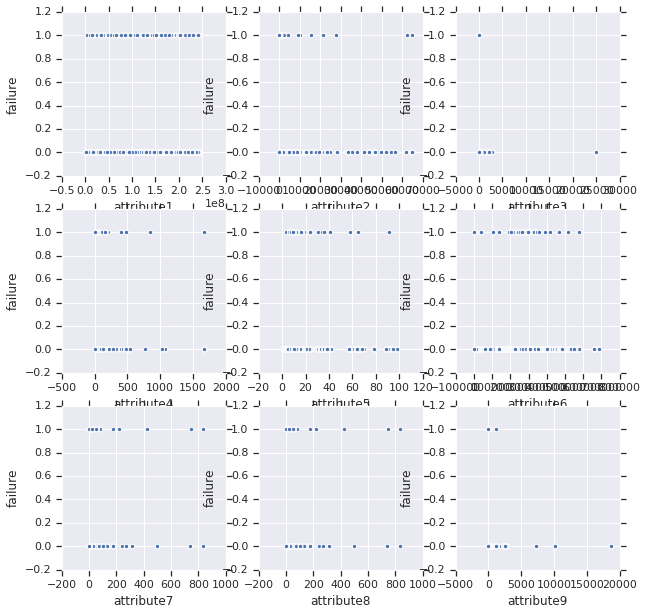

In [28]:
#Visualization cell
fig, axes = plt.subplots(nrows=3 ,ncols=3, figsize=(10, 10))
data.plot.scatter(x='attribute1', y='failure',ax=axes[0,0]);
data.plot.scatter(x='attribute2', y='failure',ax=axes[0,1]);
data.plot.scatter(x='attribute3', y='failure',ax=axes[0,2]);
data.plot.scatter(x='attribute4', y='failure',ax=axes[1,0]);
data.plot.scatter(x='attribute5', y='failure',ax=axes[1,1]);
data.plot.scatter(x='attribute6', y='failure',ax=axes[1,2]);
data.plot.scatter(x='attribute7', y='failure',ax=axes[2,0]);
data.plot.scatter(x='attribute8', y='failure',ax=axes[2,1]);
data.plot.scatter(x='attribute9', y='failure',ax=axes[2,2]);
plt.show()


In [5]:
#Applying feature selection filtering algorithm on attributes array to choose top 5 features
#using SelectKBest filtering method with mutual_info_classif statistical test
sel = SelectKBest( score_func = mutual_info_classif, k=5)
new_attr = sel.fit_transform(np_attributes, target)

#printing the scores given to each feature/attribute
print(sel.scores_)

#printing the choosen attributes
print(new_attr)


[9.04540398e-05 7.31805020e-04 2.73636555e-05 1.18595316e-03
 1.56769088e-03 3.86520374e-05 8.68078468e-04 1.01332369e-03
 0.00000000e+00]
[[  56   52    6    0    0]
 [   0    0    6    0    0]
 [   0    0   12    0    0]
 ...
 [4832    0   11    0    0]
 [   0    0   12    0    0]
 [   0    0   10    0    0]]


In [6]:
#Applying wrapping feature selection algorithm using Recursive Feature Elimination
#with Suppore Vector Calssification algorithm for the model training
model = LogisticRegression()
rfe = RFE(model, 5)
attr = rfe.fit(np_attributes, np_target)

print("Num Features: %s" % (attr.n_features_))
print("Selected Features: %s" % (attr.support_))
print("Feature Ranking: %s" % (attr.ranking_))


Num Features: 5
Selected Features: [ True  True False  True  True  True False False False]
Feature Ranking: [1 1 4 1 1 1 3 2 5]


In [18]:
#Applying Embedded Selection Technique using Ridge method
ridge = Ridge(alpha=1.0)
ridge.fit(np_attributes,np_target)

# A helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 5), name)
                                   for coef, name in lst)

#printing the coefficients
print ("Ridge model:", pretty_print_coefs(ridge.coef_))


Ridge model: 0.0 * X0 + 0.0 * X1 + -0.0 * X2 + 7e-05 * X3 + 1e-05 * X4 + 0.0 * X5 + 0.00022 * X6 + 0.00022 * X7 + 0.0 * X8
